In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
class SpreadSheet():

    def __init__(self):
        self.data = None

    def get_description(self):
        return self.data.describe()


class MotorAccidentData(SpreadSheet):

    def __init__(self):
        self.data = pd.read_csv('../CSVs/hki_liikenneonnettomuudet.csv',
                                ';',
                                # removed location data as it overcomplicates
                                # everything)
                                usecols=[0, 3, 4],
                                names=['Category', 'Severity', 'Year'],
                                skiprows=[0])

    def format_data(self):
        severity = {1: 'property damage',
                    2: "injury",
                    3: "fatality"}

        accident_type = {"JK": "pedestrian",
                         "PP": "bicycle",
                         "MP": "motorbike",
                         "MA": "car"}

        self.data['Category'] = self.data['Category'].map(accident_type)
        self.data['Severity'] = self.data['Severity'].map(severity)


class SwimmingPoolData(SpreadSheet):
    def __init__(self):
        self.data = pd.read_csv('../CSVs/Uimahallien kÑyntitapahtumatv2.csv',
                                ';', encoding='ISO-8859-1')


class BirdData(SpreadSheet):

    def __init__(self):
        self.data = pd.read_csv('../CSVs/lintuatlas12.zip Folder/havainnot.csv',
                                     header=None,
                                     usecols=[
                                         0, 3, 4, 5],  # removed location data as it overcomplicates everything
                                     names=['Species',
                                            'Nesting category 1974-79',
                                            'Nesting category 1986-89',
                                            'Nesting categories combined'])
        self.species = pd.read_csv(
            '../CSVs/lintuatlas12.zip Folder/lajit.csv',
            encoding='ISO-8859-1',
            usecols=[
                0,
                4],
            squeeze=True,
            index_col=0,
            header=None)

    def format_data(self):
        """Information on how to map the data was taken from
        the accompanying file 'ohje.txt'"""
        nesting_categories = {0: 'No sighting',
                              1: 'Unlikely nesting',
                              2: 'Possible nesting',
                              3: 'Likely nesting',
                              4: 'Certain Nesting'}

        self.data['Species'] = self.data['Species'].map(self.species)
        self.data['Nesting category 1974-79'] = self.data['Nesting category 1974-79'].map(
            nesting_categories)
        self.data['Nesting category 1986-89'] = self.data['Nesting category 1986-89'].map(
            nesting_categories)
        self.data['Nesting categories combined'] = self.data['Nesting categories combined'].map(
            nesting_categories)


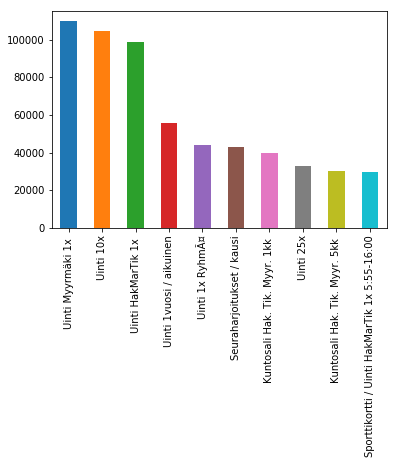

In [16]:
pool_stats = SwimmingPoolData()
pool_stats.data['Product'].value_counts().head(10).plot(kind='bar')

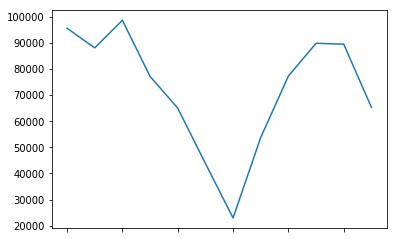

In [30]:
def remove_day(date):
    _, month_year = date.split('.', 1)
    if len(month_year) == 6:
        month_year = '0'+month_year
    return month_year
pool_stats.data['Date'].apply(remove_day).value_counts().sort_index().plot()

In [195]:
acc_stats = MotorAccidentData()
acc_stats.format_data()
acc_stats.data

,Category,Severity,Year
0,car,property damage,2010
1,car,injury,2010
2,car,property damage,2010
3,car,property damage,2010
4,car,property damage,2010
5,car,injury,2010
6,car,property damage,2010
7,car,property damage,2010
8,car,injury,2010
9,car,property damage,2010


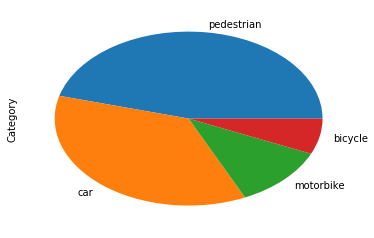

In [38]:
#acc_stats.data[['Category','Severity']].f
acc_stats.data.loc[acc_stats.data['Severity'] == 'fatality']['Category'].value_counts().plot(kind='pie')

In [100]:
df = acc_stats.data
#df.apply(pd.Series.value_counts())
#df.apply(pd.Series.value_counts).plot(kind='bar')


In [92]:
#import numpy as np
#df = pd.DataFrame(np.random.randint(0, 2, (10, 4)), columns=list('abcd'))
#df[['a','b']].apply(pd.Series.value_counts)
#df.columns

,variable,value
0,Category,car
1,Category,car
2,Category,car
3,Category,car
4,Category,car
5,Category,car
6,Category,car
7,Category,car
8,Category,car
9,Category,car


In [99]:
a=zip(tuple(df['Category']),df['Year'])
#def split_val(l):
#    for tup in l:
#        player, year = tup
#        if player == car:
            
    
b=pd.Series(list(a), name='occurance').value_counts().sort_index()
b

(bicycle, 2000)        189
(bicycle, 2001)        145
(bicycle, 2002)        162
(bicycle, 2003)        150
(bicycle, 2004)        137
(bicycle, 2005)        143
(bicycle, 2006)        151
(bicycle, 2007)        175
(bicycle, 2008)        178
(bicycle, 2009)        177
(bicycle, 2010)        180
(bicycle, 2011)        181
(bicycle, 2012)        169
(bicycle, 2013)        183
(bicycle, 2014)        174
(bicycle, 2015)        161
(car, 2000)           2649
(car, 2001)           2432
(car, 2002)           2231
(car, 2003)           2027
(car, 2004)           2020
(car, 2005)           2089
(car, 2006)           2063
(car, 2007)           2178
(car, 2008)           2096
(car, 2009)           1869
(car, 2010)           2632
(car, 2011)           2380
(car, 2012)           2646
(car, 2013)           2093
                      ... 
(motorbike, 2002)       83
(motorbike, 2003)       66
(motorbike, 2004)       94
(motorbike, 2005)       99
(motorbike, 2006)      134
(motorbike, 2007)      121
(

In [188]:
#df = acc_stats.data[['Severity','Year']]
#a = df.groupby('Severity').count()
#a.index = a.index.set_names(['Severity', 'Year', ])
#a.unstack(level=0).plot(kind='line', subplots=True) 
#df['Severity'].value_counts()
#a
#acc_stats.data['Severity'].count()

,Year
Severity,
fatality,166
injury,8247
property damage,33364


car           34899
bicycle        2655
pedestrian     2512
motorbike      1711
Name: Category, dtype: int64

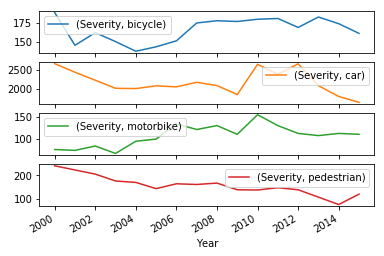

In [173]:
#df = acc_stats.data
#a = df.groupby(['Category','Year']).count()
#a.index = a.index.set_names(['Category', 'Year', ])
#a.unstack(level=0).plot(kind='line', subplots=True) 
#df['Category'].value_counts()

In [212]:
df = acc_stats.data
a=df['Category'] == 'car'
list(a).count(True)
df

,Category,Severity,Year
0,car,property damage,2010
1,car,injury,2010
2,car,property damage,2010
3,car,property damage,2010
4,car,property damage,2010
5,car,injury,2010
6,car,property damage,2010
7,car,property damage,2010
8,car,injury,2010
9,car,property damage,2010


In [288]:
#df.loc[df['Category'] == 'pedestrian'].set_index('Year')['Category'].groupby(df.columns.tolist(), as_index=False).size()
df[['Severity','Year']].groupby(df[['Severity','Year']].columns.tolist(),as_index=False).size().unstack(level=0).plot(subplots=True)
df[['Severity','Year']].groupby(df[['Severity','Year']]

SyntaxError: unexpected EOF while parsing (<ipython-input-288-9af451e10b48>, line 3)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1295b3780>,
      dtype=object)

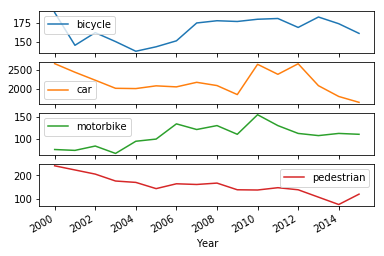

In [237]:
#df.loc[df['Category'] == 'pedestrian'].set_index('Year')['Category'].groupby(df.columns.tolist(), as_index=False).size()
df[['Category','Year']].groupby(df[['Category','Year']].columns.tolist(),as_index=False).size().unstack(level=0).plot(subplots=True)

In [240]:
bird_stats = BirdData()
bird_stats.format_data()
df = bird_stats.data
df

,Species,Nesting category 1974-79,Nesting category 1986-89,Nesting categories combined
0,Mute Swan,No sighting,Certain Nesting,Certain Nesting
1,Mute Swan,No sighting,Unlikely nesting,Unlikely nesting
2,Mute Swan,Certain Nesting,Certain Nesting,Certain Nesting
3,Mute Swan,Possible nesting,Likely nesting,Likely nesting
4,Mute Swan,Certain Nesting,Certain Nesting,Certain Nesting
5,Mute Swan,No sighting,Possible nesting,Possible nesting
6,Mute Swan,No sighting,Certain Nesting,Certain Nesting
7,Mute Swan,Possible nesting,No sighting,Possible nesting
8,Mute Swan,Possible nesting,Certain Nesting,Certain Nesting
9,Mute Swan,Certain Nesting,Certain Nesting,Certain Nesting


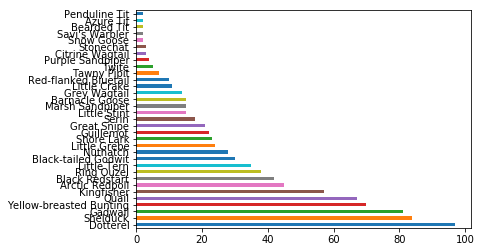

In [267]:
s = df['Species'].value_counts()
s.loc[s < 100].plot('barh')

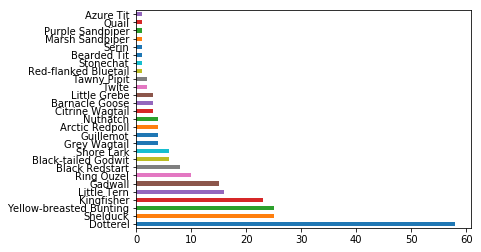

In [274]:
sd = df.loc[df['Nesting categories combined'] == 'Certain Nesting']['Species'].value_counts()
sd.loc[s < 100].plot('barh')

In [287]:
a = df.loc[df['Nesting category 1974-79'] == 'No sighting']
a1 = a.loc[a['Nesting category 1986-89'] == 'Certain Nesting'] 
a1['Species'].value_counts()

Tengmalm's Owl              404
Goldeneye                   353
Goshawk                     350
Eagle Owl                   340
Whooper Swan                336
Mallard                     325
Teal                        319
Pied Flycatcher             310
Great Spotted Woodpecker    301
Sparrowhawk                 282
Long-eared Owl              279
Sand Martin                 277
Crossbill                   270
Capercaillie                266
Ural Owl                    263
Blue Tit                    262
Raven                       259
Meadow Pipit                255
Goosander                   252
Redstart                    251
Black-throated Diver        248
Great Tit                   247
Wigeon                      245
Willow Tit                  245
Hawk Owl                    234
House Martin                220
Hazel Grouse                219
House Sparrow               218
Willow Grouse               218
Parrot Crossbill            212
                           ... 
Shelduck